In [50]:
# %%capture
# !pip install keras==2.1.2 --upgrade
# !yes | cp -rf drive/ColabDeepLearning/jesperDev/image.py /usr/local/lib/python3.6/dist-packages/keras/preprocessing/image.py
# imports
from pathlib import Path
from time import time
import numpy as np
import os 
import csv
import tensorflow as tf
import keras
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras import regularizers
from keras.models import Model
from keras.optimizers import SGD, Adamax
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint    
import matplotlib.pyplot as plt

Found 1 images belonging to 1 classes.


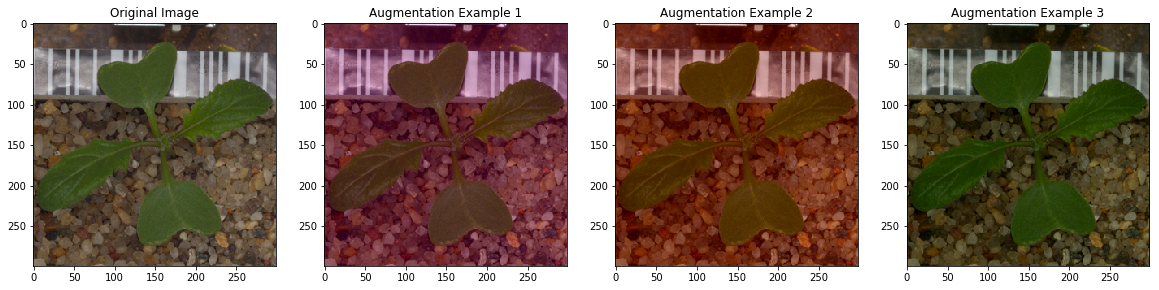

In [106]:
# Configure the loading of data
# Image Generator
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    channel_shift_range=40,
#     brightness_custom = 30,
#     rotation_range=360,
#     shear_range=0.5,
#     zoom_range = 0.5,
#     width_shift_range = 0.5,
#     height_shift_range = 0.5,
#     horizontal_flip = True,
#     vertical_flip = True
)

train_generator = train_datagen.flow_from_directory(
        "C:/Data/Google Drive/ColabDeepLearning/jesperDev",  # this is the target directory
        target_size=(299,299),
        batch_size=1,
        class_mode='categorical') 

x0,y0 = train_generator.next()
x1,y1 = train_generator.next()
x2,y2 = train_generator.next()
x3,y3 = train_generator.next()
# class_lbl = list((train_generator.class_indices.keys()))

fig, axs = plt.subplots(1, 4, figsize=(20, 5))
orig = load_img('C:/Data/Google Drive/ColabDeepLearning/jesperDev/images/Charlock.png')

axs[0].imshow(orig)
axs[0].set_title("Original Image")
axs[1].imshow((x1[0]+1.)/2.)
axs[1].set_title("Augmentation Example 1")
axs[2].imshow((x2[0]+1.)/2.)
axs[2].set_title("Augmentation Example 2")
axs[3].imshow((x3[0]+1.)/2.)
axs[3].set_title("Augmentation Example 3")

#     axs[j].set_title(class_lbl[y[j].argmax(axis=0)]) #get the title property handler
axs[0].grid(False)

In [0]:
model2 = Model(inputs=base_model.input, outputs=predictions)

# Load possible weights for the model
model2.load_weights(main_path + '/' + 'Par_T8000_V500_D2048_L179_B40_Drop0_4_KReg0_25_Lr0_01_minLr1e-09.E119-L0.106-A0.979' +  '.hdf5')
#model.load_weights('drive/' + filename +  '.hdf5')
model3 = Model(inputs=base_model.input, outputs=predictions)

# Load possible weights for the model
model3.load_weights(main_path + '/' + 'Par_T8000_V500_D2048_L179_B40_Drop0_4_KReg0_25_Lr0_01_minLr1e-09.E136-L0.099-A0.977' +  '.hdf5')

In [0]:
weights = [model.get_weights(), model2.get_weights(), model3.get_weights()]

new_weights = list()

for weights_list_tuple in zip(*weights):
    new_weights.append(
        [np.array(weights_).mean(axis=0)\
            for weights_ in zip(*weights_list_tuple)])

model.set_weights(new_weights)

In [0]:
# FUNCTION TO PREDICT TEST DATA AND GENERATING A RESULTING CSV FILE FOR KAGGLE
# Read in the test data
source ="Resized_400/test"
dest = main_path + '/' + filename + '.csv'
#dest = 'drive/' + filename + '.csv'
test_lbl = os.listdir(source)

x_test=[]

# Read the images one by one
for i in test_lbl:
  x = load_img(source + '/'+ i)
  x = img_to_array(x)
  x_test.append(x)
  
# Convert to numpy array  
x_test = np.array(x_test)

# Apply inceptionV3 preprocessing
x_test_std = preprocess_input(x_test)

# Extract class labels from the training generator
class_lbl = list((train_generator.class_indices.keys()))

# Do the prediction
y_predict = model.predict(x_test_std, batch_size = batch_size)
y_predict = y_predict.argmax(axis=-1)

# Write csv file 
f = open(dest, 'wt')
try:
    writer = csv.writer(f)
    writer.writerow( ('file', 'species') )
    for i in range(0, len(y_predict)):
        writer.writerow( (test_lbl[i], class_lbl[y_predict[i]]) )
finally:
    f.close()